In [2]:
import pickle

# Example object (placeholder for trained model)
model_data = {
    "n_qubits": 3,
    "parameters": [0.1, 0.5, 0.9],
    "fidelity": 0.93
}

# Save
with open("model_example.pkl", "wb") as f:
    pickle.dump(model_data, f)

# Load
with open("model_example.pkl", "rb") as f:
    loaded_model = pickle.load(f)

loaded_model

{'n_qubits': 3, 'parameters': [0.1, 0.5, 0.9], 'fidelity': 0.93}

In [10]:
import numpy as np
import pickle

class SurrogateModel:
    def __init__(self, n_qubits, hidden_dim=64):
        self.n_qubits = n_qubits
        self.state_dim = 2 ** n_qubits
        
        # Simple linear surrogate parameters
        self.weights = np.random.randn(hidden_dim, self.state_dim)
        self.bias = np.random.randn(self.state_dim)

    def forward(self, x):
        """
        x: input measurement data (dummy input for now)
        """
        out = x @ self.weights + self.bias
        return out

    def save(self, path):
        with open(path, "wb") as f:
            pickle.dump(self, f)

    @staticmethod
    def load(path):
        with open(path, "rb") as f:
            return pickle.load(f)

In [11]:
# Test for different qubit sizes
model_2q = SurrogateModel(n_qubits=2)
model_3q = SurrogateModel(n_qubits=3)

print("2-qubit output dim:", model_2q.state_dim)
print("3-qubit output dim:", model_3q.state_dim)

2-qubit output dim: 4
3-qubit output dim: 8


In [12]:
model_3q.save("surrogate_3q.pkl")

loaded_model = SurrogateModel.load("surrogate_3q.pkl")
print("Loaded model qubits:", loaded_model.n_qubits)

Loaded model qubits: 3


In [15]:
import time

def generate_true_state(n_qubits):
    dim = 2 ** n_qubits
    state = np.random.randn(dim)
    return state / np.linalg.norm(state)

def compute_fidelity(true_state, pred_state):
    pred_state = pred_state / np.linalg.norm(pred_state)
    return np.abs(np.dot(true_state, pred_state)) ** 2

In [16]:
results = []

n_qubits_list = [2, 3, 4, 5]

for n in n_qubits_list:
    model = SurrogateModel(n_qubits=n)
    
    x = np.random.randn(model.weights.shape[0])
    true_state = generate_true_state(n)

    start_time = time.time()
    pred_state = model.forward(x)
    runtime = time.time() - start_time

    fidelity = compute_fidelity(true_state, pred_state)

    results.append({
        "n_qubits": n,
        "fidelity": fidelity,
        "runtime": runtime
    })

results

[{'n_qubits': 2,
  'fidelity': np.float64(0.21243025912710853),
  'runtime': 0.002521038055419922},
 {'n_qubits': 3,
  'fidelity': np.float64(0.16794879189146514),
  'runtime': 1.1920928955078125e-05},
 {'n_qubits': 4,
  'fidelity': np.float64(0.025695167641082938),
  'runtime': 1.9073486328125e-06},
 {'n_qubits': 5,
  'fidelity': np.float64(0.09905590593347373),
  'runtime': 1.9073486328125e-06}]

In [17]:
for r in results:
    print(f"Qubits: {r['n_qubits']} | Fidelity: {r['fidelity']:.3f} | Runtime: {r['runtime']:.6f}s")

Qubits: 2 | Fidelity: 0.212 | Runtime: 0.002521s
Qubits: 3 | Fidelity: 0.168 | Runtime: 0.000012s
Qubits: 4 | Fidelity: 0.026 | Runtime: 0.000002s
Qubits: 5 | Fidelity: 0.099 | Runtime: 0.000002s


In [18]:
qubits = [r["n_qubits"] for r in results]
fidelities = [r["fidelity"] for r in results]
runtimes = [r["runtime"] for r in results]

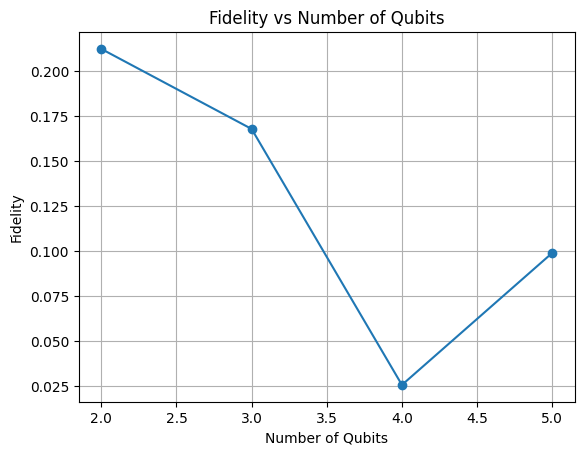

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(qubits, fidelities, marker='o')
plt.xlabel("Number of Qubits")
plt.ylabel("Fidelity")
plt.title("Fidelity vs Number of Qubits")
plt.grid(True)
plt.show()

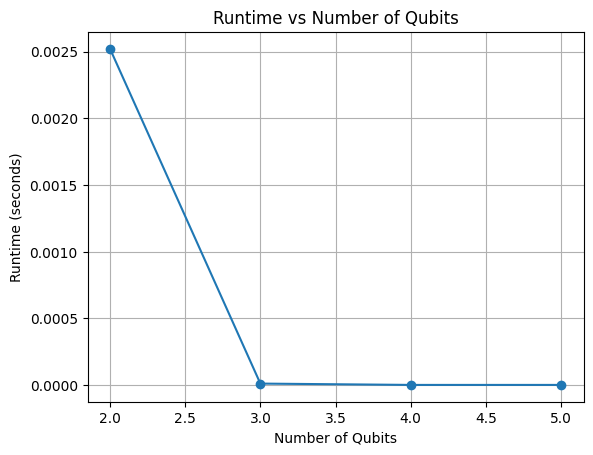

In [20]:
plt.figure()
plt.plot(qubits, runtimes, marker='o')
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime vs Number of Qubits")
plt.grid(True)
plt.show()

In [21]:
hidden_dims = [16, 64, 128]
n_qubits = 3

ablation_results = []

for h in hidden_dims:
    model = SurrogateModel(n_qubits=n_qubits, hidden_dim=h)

    x = np.random.randn(h)
    true_state = generate_true_state(n_qubits)

    pred_state = model.forward(x)
    fidelity = compute_fidelity(true_state, pred_state)

    ablation_results.append({
        "hidden_dim": h,
        "fidelity": fidelity
    })

ablation_results

[{'hidden_dim': 16, 'fidelity': np.float64(0.2856158792188995)},
 {'hidden_dim': 64, 'fidelity': np.float64(0.043240081725107425)},
 {'hidden_dim': 128, 'fidelity': np.float64(0.028156246096275594)}]

In [22]:
for r in ablation_results:
    print(f"Hidden dim: {r['hidden_dim']} | Fidelity: {r['fidelity']:.3f}")

Hidden dim: 16 | Fidelity: 0.286
Hidden dim: 64 | Fidelity: 0.043
Hidden dim: 128 | Fidelity: 0.028
